In [13]:
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

In [14]:
# load dataset
df = pd.read_csv('../../datasets/atis_dataset_preprocessed.csv', sep=';')

In [15]:
# define label columns
label_columns = ['ILS', 'RNAV', 'RNP', 'VISUAL']

# define features and targets
X = df.drop(columns=label_columns)

# one-hot encode features that are categorical
X = pd.get_dummies(X, columns=['airport_icao', 'runway_designator_side', 'weather_phenomenon', 
                                'runway_designator_number', 'rvr_tendency', 'runway_ils_category'])

In [16]:
y = df[label_columns]

In [17]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# build and train multi-label model
model = MultiOutputClassifier(XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
model.fit(X_train, y_train)

C:\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:17:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:17:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:17:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:17:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None,
                                              feature_weights=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None, ...))

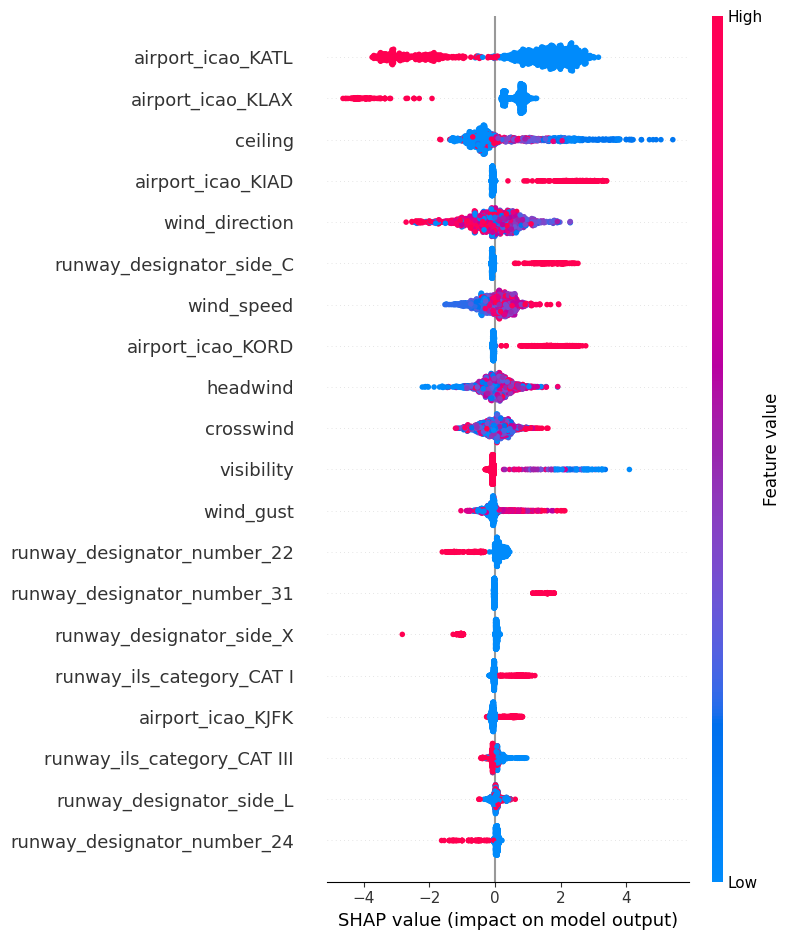

In [20]:
# ILS SHAP
explainer_ILS = shap.TreeExplainer(model.estimators_[0])
shap_ILS = explainer_ILS.shap_values(X_test)
shap.summary_plot(shap_ILS, X_test)

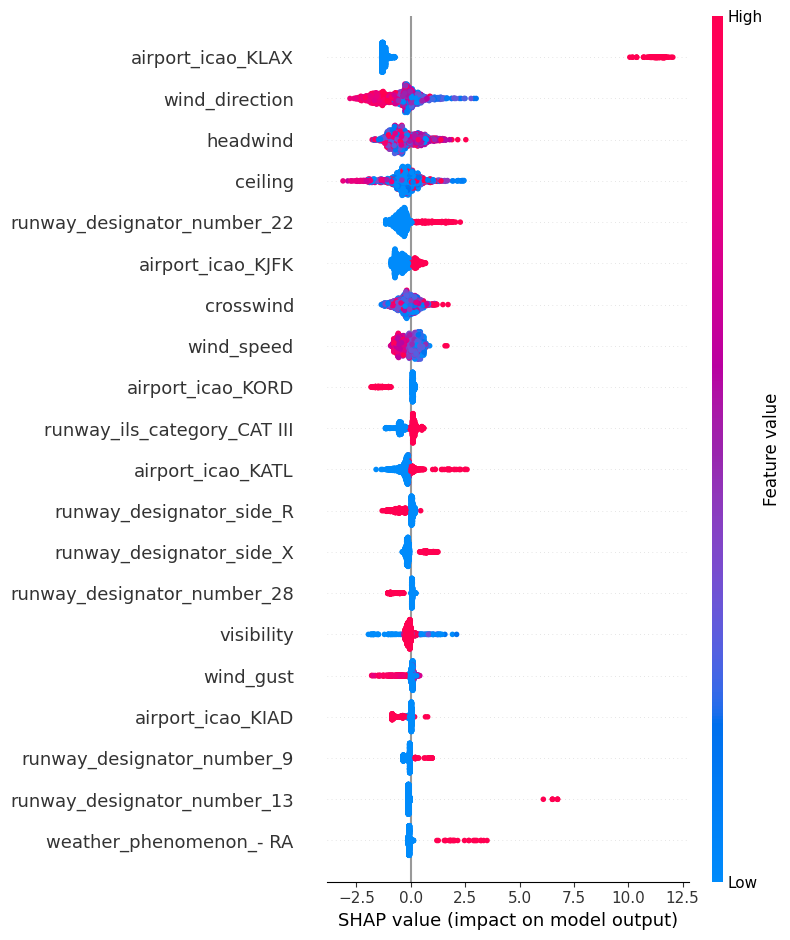

In [21]:
# RNAV SHAP
explainer_RNAV = shap.TreeExplainer(model.estimators_[1])
shap_RNAV = explainer_RNAV.shap_values(X_test)
shap.summary_plot(shap_RNAV, X_test)

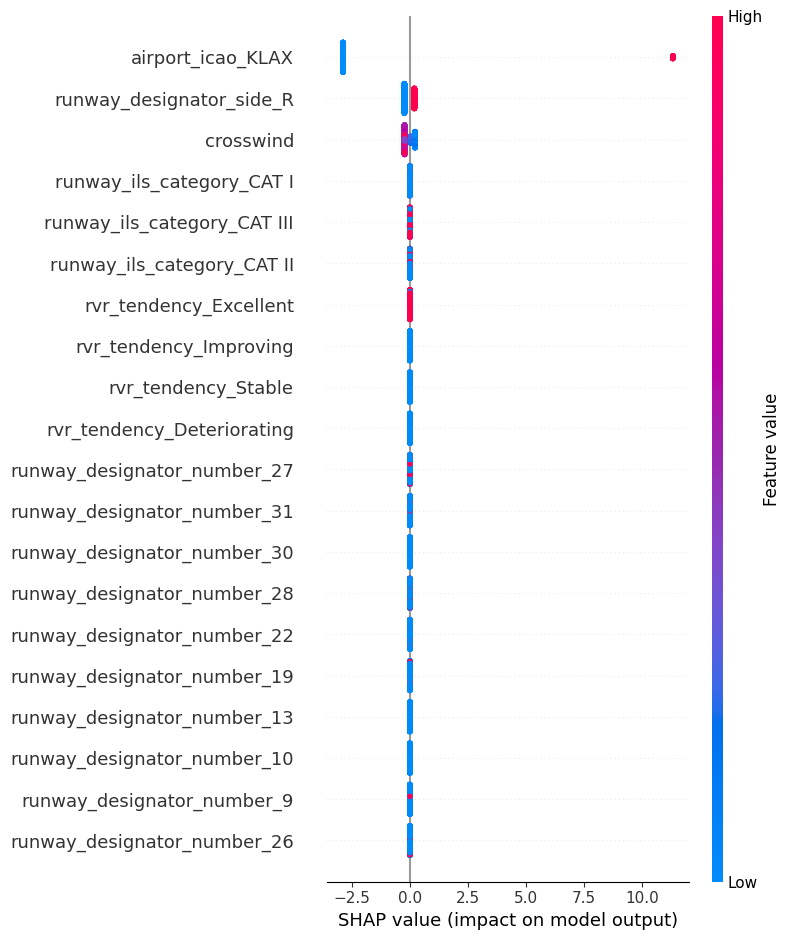

In [22]:
# RNP SHAP
explainer_RNP = shap.TreeExplainer(model.estimators_[2])
shap_RNP = explainer_RNP.shap_values(X_test)
shap.summary_plot(shap_RNP, X_test)

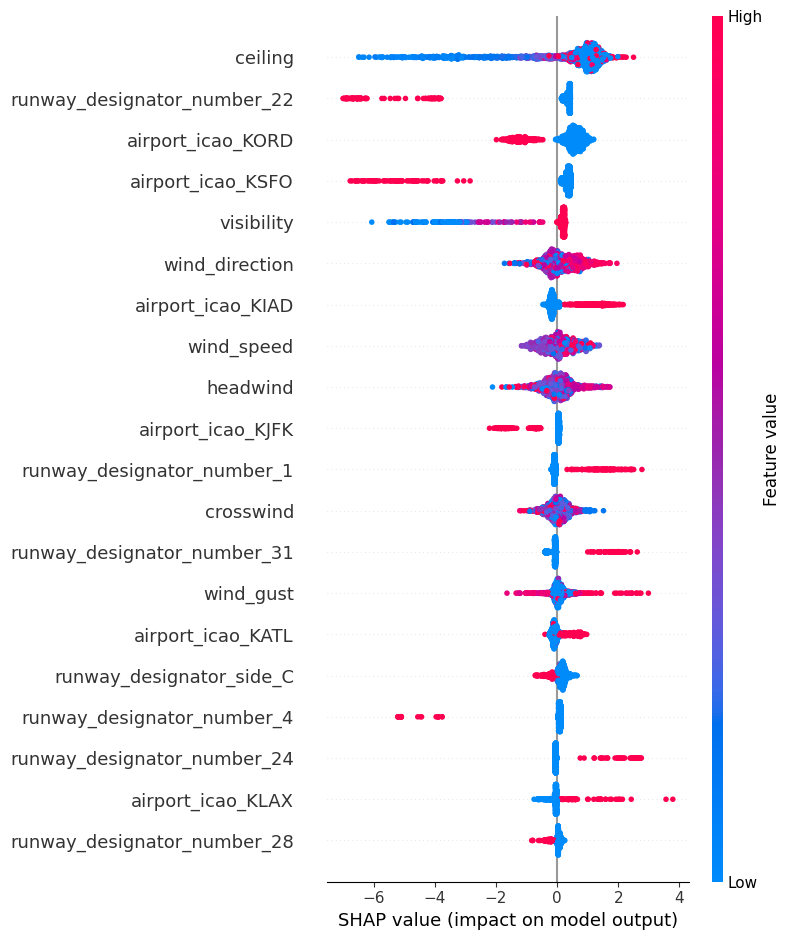

In [23]:
# VISUAL SHAP
explainer_VISUAL = shap.TreeExplainer(model.estimators_[3])
shap_VISUAL = explainer_VISUAL.shap_values(X_test)
shap.summary_plot(shap_VISUAL, X_test)

In [24]:
# predict and evaluate
y_pred = model.predict(X_test)
empty_mask = y_pred.sum(axis=1) == 0
no_predictions = np.sum(empty_mask)
print(f"Samples with no predicted labels: {no_predictions} out of {len(y_pred)}")
print(X_test[empty_mask])
print(classification_report(y_test, y_pred, target_names=label_columns, zero_division=0))

Samples with no predicted labels: 0 out of 1319
Empty DataFrame
Columns: [visibility, wind_speed, wind_gust, wind_direction, rvr, headwind, crosswind, ceiling, airport_icao_KATL, airport_icao_KIAD, airport_icao_KJFK, airport_icao_KLAX, airport_icao_KORD, airport_icao_KSFO, runway_designator_side_C, runway_designator_side_L, runway_designator_side_R, runway_designator_side_X, weather_phenomenon_+ RA, weather_phenomenon_+ RA BR, weather_phenomenon_+ TS RA BR, weather_phenomenon_- DZ BR, weather_phenomenon_- DZ FG, weather_phenomenon_- RA, weather_phenomenon_- RA BR, weather_phenomenon_- RA HZ, weather_phenomenon_- RA PL BR, weather_phenomenon_- RA SN BR, weather_phenomenon_- SN, weather_phenomenon_- SN BR, weather_phenomenon_- SN GS BR, weather_phenomenon_- SN PL BR, weather_phenomenon_- TS RA, weather_phenomenon_- TS RA BR, weather_phenomenon_BR, weather_phenomenon_DU, weather_phenomenon_FG, weather_phenomenon_HZ, weather_phenomenon_MI FG, weather_phenomenon_RA, weather_phenomenon_RA BR